# Pre-Processing Stage 

In [10]:
#Look components of dataset
import pandas as pd
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
dataset.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [14]:
#Columns's string treatment and drop unused column
dataset.columns = [s.strip().replace(' ', '_') for s in dataset.columns]
dataset = dataset.rename(columns = {'Annual_Income_(k$)':'Annual_Income', 'Spending_Score_(1-100)':'Spending_Score'})
dataset = dataset.drop(columns = 'CustomerID')
dataset.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

<Figure size 432x288 with 0 Axes>

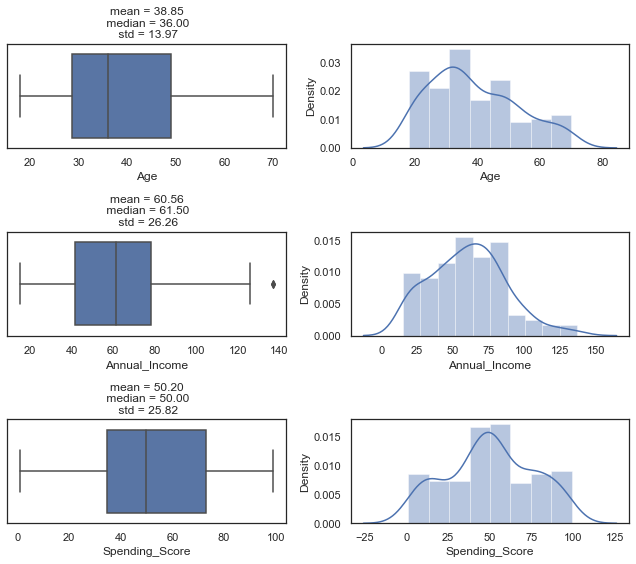

In [15]:
#Explore data distribution for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white')
plt.clf()

# Make a function to create plots
def create_plot(columns):
    fig, axs = plt.subplots(3, 2, figsize=(9, 8))
    for i, col in enumerate(columns):
        sns.boxplot(dataset[col], ax = axs[i][0])
        sns.distplot(dataset[col], ax = axs[i][1])
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(dataset[col].mean(), dataset[col].median(), dataset[col].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

# Call create_plot function
numerical_columns = ['Age','Annual_Income','Spending_Score']
create_plot(numerical_columns)


From these three tables, we can conclude:
* The average age of customers who visit the mall is 38 years with average annual income = 61.50 k$ and the average spending score obtained by customers is 50.20
* There are outliers in the 'Annual Income' column
* The distribution of data in the three numeric columns does not experience a significant skew (relatively normal)

Now, we will treat the outliers


In [17]:
#Overcome outliers in Annual_Income column with Interquartil (IQR) method
Q1 = dataset['Annual_Income'].quantile(0.25)
Q3 = dataset['Annual_Income'].quantile(0.75)

print('Q1 = {} and Q3 = {}'.format(Q1,Q3))
IQR = Q3-Q1
outlier_lowerLimit = Q1-1.5*IQR 
outlier_upperLimit = Q3+1.5*IQR
print('outlier_lowerLimit = {} dan outlier_upperLimit = {}'.format(outlier_lowerLimit,outlier_upperLimit))
#Negative value means there are no outlier

Q1 = 41.5 and Q3 = 78.0
outlier_lowerLimit = -13.25 dan outlier_upperLimit = 132.75


In [18]:
outliers = dataset[(dataset['Annual_Income']>outlier_upperLimit)|(dataset['Annual_Income']<outlier_lowerLimit)]
outliers

,Gender,Age,Annual_Income,Spending_Score
198,Male,32,137,18
199,Male,30,137,83


In [19]:
print('Initial dataset size = ', dataset.shape)
dataset_final = dataset[~((dataset['Annual_Income']>outlier_upperLimit)|(dataset['Annual_Income']<outlier_lowerLimit))]
print('Final dataset size = ', dataset_final.shape)


Initial dataset size =  (200, 4)
Final dataset size =  (198, 4)


In [20]:
#Let save this new dataset for the last modeling process
dataset_final.to_csv('Mall Customers Drop.csv')


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

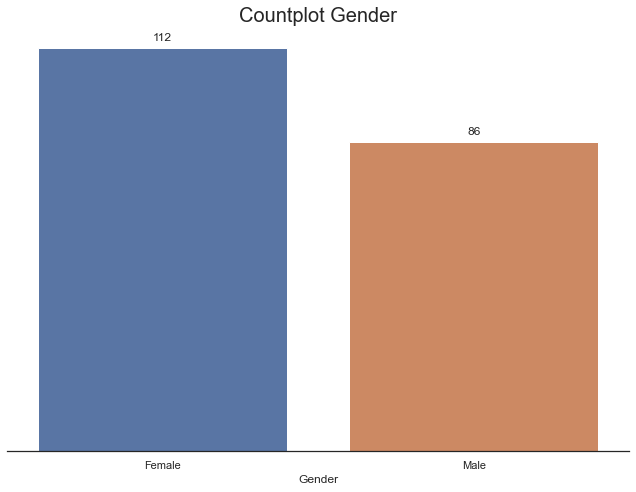

In [21]:
#Visualize the count gender type who visited the Mall
fig,axs = plt.subplots(1,1,figsize=(9,7))

#Create a plot
sns.countplot(dataset_final['Gender'], order = dataset_final['Gender'].value_counts().head(10).index, ax =axs)
axs.set_title('Countplot Gender', fontsize = 20)
plt.xticks(rotation = 0)
#Create annotate
for i in axs.patches:
    axs.annotate(format(i.get_height(), '.0f'),
                    (i.get_x() + i.get_width() / 2., i.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

# Setting Plot
sns.despine(right=True,top = True, left = True)
axs.axes.yaxis.set_visible(False)
plt.setp(axs)
plt.tight_layout()
plt.show();


In [22]:
#Encode category column
from sklearn.preprocessing import LabelEncoder

category_column = ['Gender']
for col in category_column:
    dataset_final[col] = LabelEncoder().fit_transform(dataset_final[col])

# Print the data final
print(dataset_final)


     Gender  Age  Annual_Income  Spending_Score
0         1   19             15              39
1         1   21             15              81
2         0   20             16               6
3         0   23             16              77
4         0   31             17              40
..      ...  ...            ...             ...
193       0   38            113              91
194       0   47            120              16
195       0   35            120              79
196       0   45            126              28
197       1   32            126              74

[198 rows x 4 columns]


In [23]:
#Save data final for modeling stage
dataset_final.to_csv('Mall Customers Clean.csv')

# Modelling Process Stage
We use K-Means Clustering Method

In [24]:
#Load the previously saved final dataset
data = pd.read_csv('Mall Customers Clean.csv')
data.head()

,Unnamed: 0,Gender,Age,Annual_Income,Spending_Score
0,0,1,19,15,39
1,1,1,21,15,81
2,2,0,20,16,6
3,3,0,23,16,77
4,4,0,31,17,40


In [25]:
data = data.drop(columns = 'Unnamed: 0')
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


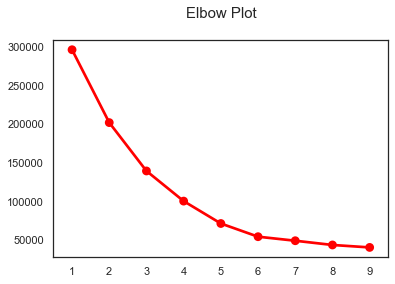

In [26]:
#Finding the best k value with Elbow Plot
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes #for both category and numeric clustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

# Iteration to get cost value
cost = {}
for k in range(1,10):
    kproto = KPrototypes(n_clusters = k,random_state=75)
    kproto.fit_predict(data, categorical=[0]) #index [0] for column 'Age'
    cost[k]= kproto.cost_

# Elbow Plot Visualization
sns.pointplot(x=list(cost.keys()), y=list(cost.values()), color = 'red')
plt.title('Elbow Plot\n', fontsize = 15)
plt.show()

In [27]:
# Let use k = 6 to fit model clustering
import pickle

kproto = KPrototypes(n_clusters=6, random_state = 75)
kproto = kproto.fit(data, categorical=[0])

# Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

In [28]:
# Determine each customer's category
clusters = kproto.predict(data, categorical=[0])
print('Customer Segmentation: {}\n'.format(clusters))

Customer Segmentation: [0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 1 2 1 4 0 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
 4 4 4 4 4 1 1 1 1 4 4 4 5 4 5 3 5 3 5 3 5 4 5 3 5 3 5 3 5 3 5 4 5 3 5 3 5
 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
 5 3 5 3 5 3 5 3 5 3 5 3 5]



In [29]:
#Load initial dataset which has dropped the outliers
df = pd.read_csv('Mall Customers Drop.csv')
df = df.drop(columns = 'Unnamed: 0')
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [30]:
# Combining initial data and customer segments
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head())

   Gender  Age  Annual_Income  Spending_Score  cluster
0    Male   19             15              39        0
1    Male   21             15              81        2
2  Female   20             16               6        0
3  Female   23             16              77        2
4  Female   31             17              40        0


In [31]:
# Display customer data based on its cluster
for i in range (0,6):
    print('\nCustomer cluster: {}\n'.format(i))
    print(df_final[df_final['cluster']== i])



Customer cluster: 0

    Gender  Age  Annual_Income  Spending_Score  cluster
0     Male   19             15              39        0
2   Female   20             16               6        0
4   Female   31             17              40        0
6   Female   35             18               6        0
8     Male   64             19               3        0
10    Male   67             19              14        0
12  Female   58             20              15        0
14    Male   37             20              13        0
16  Female   35             21              35        0
18    Male   52             23              29        0
20    Male   35             24              35        0
22  Female   46             25               5        0
24  Female   54             28              14        0
26  Female   45             28              32        0
28  Female   40             29              31        0
30    Male   60             30               4        0
32    Male   53           

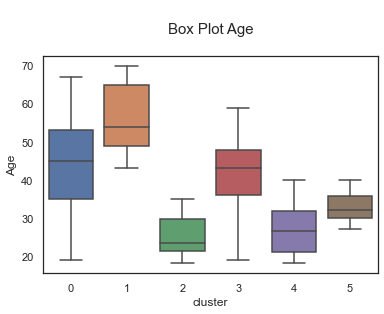

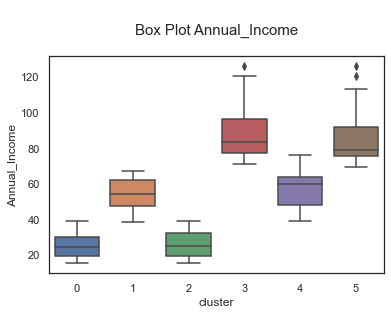

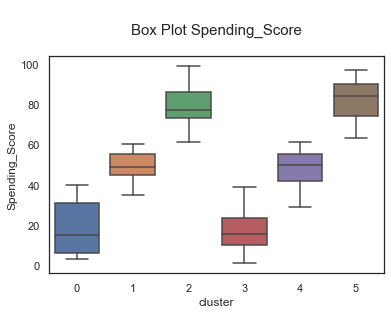

In [32]:
# Numerical Data Cluster Visualization
columns_numeric = ['Age','Annual_Income','Spending_Score']

for i in columns_numeric:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=15)
    plt.show()

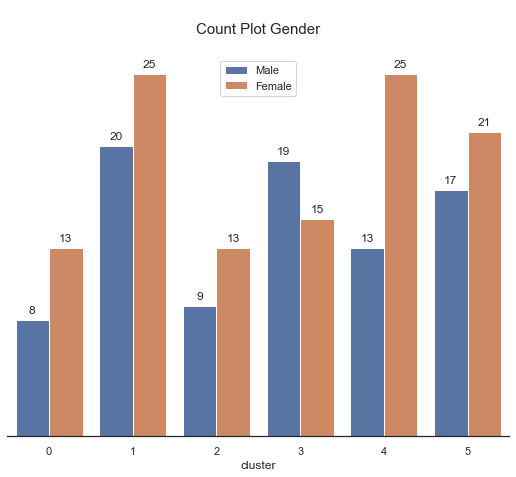

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

# Categorical Data Cluster Visualization
columns_categorical = ['Gender']

for i in columns_categorical:
    plt.figure(figsize=(9,7))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=15)
    ax.legend(loc="upper center")
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

    sns.despine(right=True,top = True, left = True)
    ax.axes.yaxis.set_visible(False)
    plt.show()

From the results of observations on the boxplot and countplot of each cluster above, the clustering can be made as follows:

* Cluster 0: Silver Society Members. The content of this cluster is the general public with an average annual income of 25 k (dollars). This cluster has an age range of about 20 - 68 years with an average of 45 years where women dominate. In addition, this cluster has a low spending_score (5-40).
* Cluster 1: Gold Society Member, the content of this cluster is the elderly general public with an average annual income of 55 k (dollars). This cluster has an age range of about 45 - 70 years with an average of 55 years where women dominate. In addition, this cluster has a moderate spending_score (30-60).
* Cluster 2: Diamond Student Member, the contents of this cluster are students and students with an average annual income of 25 k (dollars). This cluster has an age range of about 20 - 35 years with an average of 22 years where women dominate. In addition, this cluster has a high spending_score (60-98).
* Cluster 3: Silver Entrepreneur Member, the contents of this cluster are entrepreneurs with an average annual income of 80 k (dollars). This cluster has an age range of about 20 - 55 years with an average of 43 years where males predominate. In addition, this cluster has a low spending_score (5-40).
* Cluster 4: Gold Young Entrepreneur Member, the contents of this cluster are young entrepreneurs with an average annual income of 60 k (dollars). This cluster has an age range of about 20 - 55 years with an average of 43 years where women dominate. In addition, this cluster has a moderate spending_score (30-60).
* Cluster 5: Diamond Young Entrepreneur Member, the contents of this cluster are young entrepreneurs with an average annual income of 75 k (dollars). This cluster has an age range of about 25 - 37 years with an average of 31 years where women dominate. In addition, this cluster has a high spending_score (65-90).

Note: To simplify naming, the cluster level is based more on the spending_score value (silver = low, gold = medium, diamond = high)

In [34]:
# Mapping column names
df_final['Segmentation'] = df_final['cluster'].map({
    0: 'Silver Society Member',
    1: 'Gold Society Member',
    2: 'Diamond Student Member',
    3: 'Silver Enterpreneur Member',
    4: 'Gold Young Enterpreneur Member',
    5: 'Diamond Young Enterpreneur Member'
    }) 

print(df_final.head())  

   Gender  Age  Annual_Income  Spending_Score  cluster            Segmentation
0    Male   19             15              39        0   Silver Society Member
1    Male   21             15              81        2  Diamond Student Member
2  Female   20             16               6        0   Silver Society Member
3  Female   23             16              77        2  Diamond Student Member
4  Female   31             17              40        0   Silver Society Member


# END
# Thank You. May be Useful